In [6]:
import numpy as np
import cv2
import os
from PIL import Image
from keras.preprocessing import image
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [7]:
path = "/home/ubuntu/nbs/data/seedlings
train_path = os.path.join(path, "train")
valid_path = os.path.join(path, "valid")

In [8]:
categories = os.listdir(train_path)
n_categories = len(categories)

### Take a look at classes and images

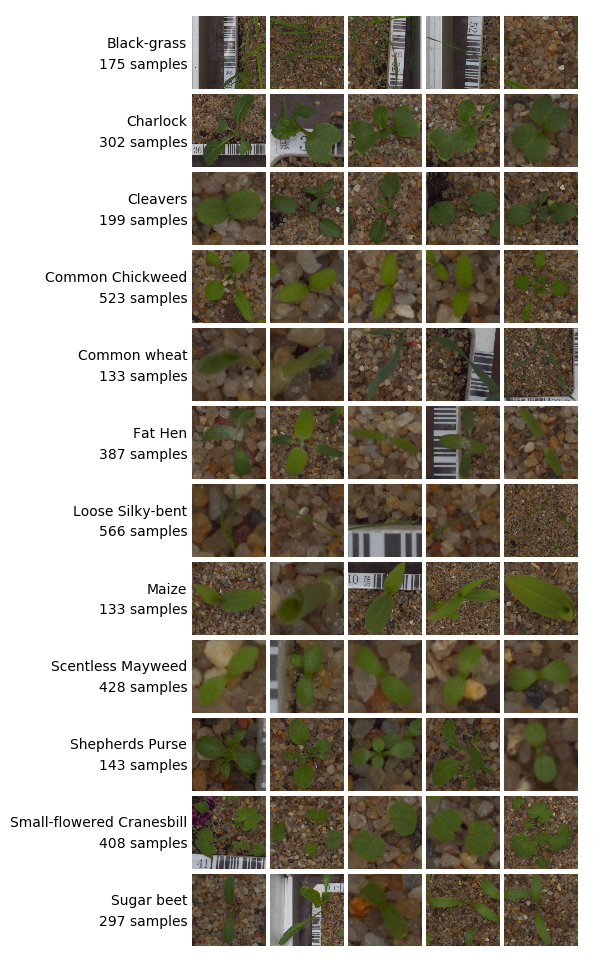

In [9]:
fig = plt.figure(1, figsize=(6, n_categories))
grid = ImageGrid(fig, 111, nrows_ncols=(n_categories, 6), axes_pad=0.05)
i = -1
for category in sorted(categories):
    category_path = os.path.join(train_path, category)
    for filepath in os.listdir(category_path)[:6]:
        i += 1
        ax = grid[i]
        ax.axis('off')
        if i % 6 == 0:
            ax.text(0, 130, category, horizontalalignment="right", 
                    verticalalignment='center')
            ax.text(0, 230, str(len(os.listdir(category_path))) + " samples", 
                    horizontalalignment="right", 
                    verticalalignment='center')
            continue
        size = (350, 350)
        img = image.load_img(os.path.join(category_path, filepath), target_size=size)
        img = image.img_to_array(img)
        ax.imshow(img / 255.)
plt.show();

### Erase the seedling from background

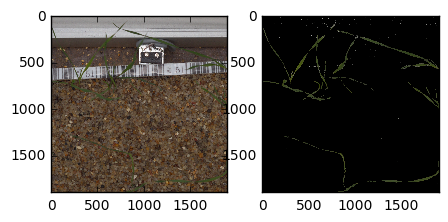

In [35]:
def cv2_preprocess_function(img):
    '''Remove background and leave only seedling.
    Inputs
    ------
        img : BGR image numpy array
    Returns
    -------
        mask :
        output : 
    '''
    #Wait BGR image numpy array
    image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_hsv = np.array([150, 0, 0])
    upper_hsv = np.array([179, 255, 255])
    mask_range = cv2.inRange(image_hsv,lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask_range, cv2.MORPH_CLOSE, kernel)
    output = cv2.bitwise_and(img, img, mask = mask)
    return mask_range, output

f = "/home/maori/Documents/fast.ai/data/seedlings/train/Black-grass/0ace21089.png"
img = image.load_img(f)
img = image.img_to_array(img) / 255.
mask, res_img = cv2_preprocess_function(img)
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(img)
axs[1].imshow(res_img)
plt.show()

    

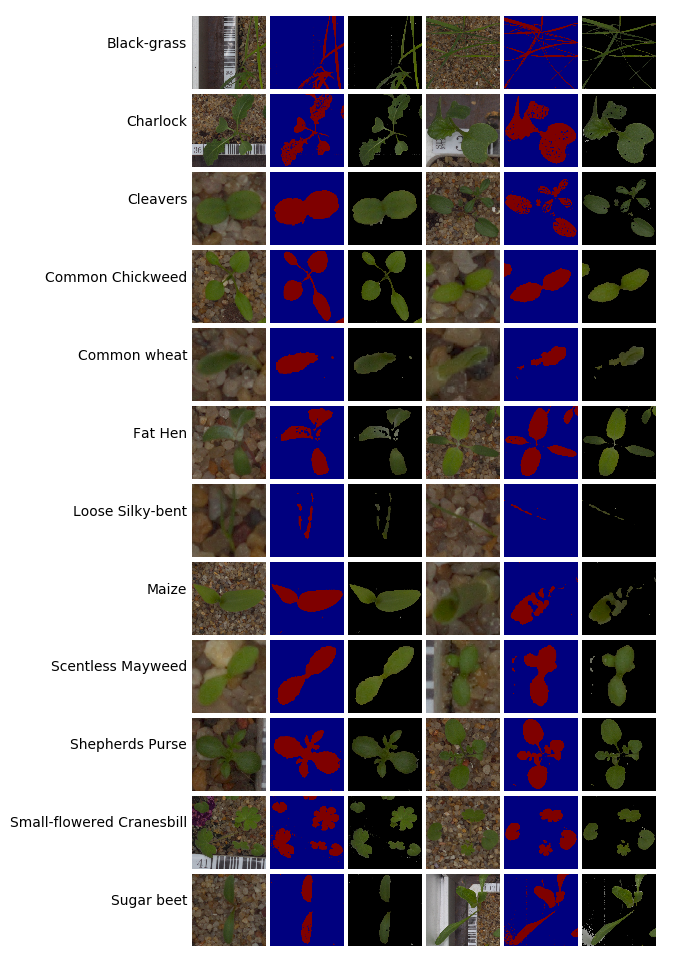

In [36]:
fig = plt.figure(1, figsize=(7, n_categories))
grid = ImageGrid(fig, 111, nrows_ncols=(n_categories, 7), axes_pad=0.05)
i = -1
categories = sorted(os.listdir(train_path))
n_categories = len(categories)
for category in categories:
    category_path = os.path.join(train_path, category)
    for filepath in os.listdir(category_path)[:3]:
        i += 1
        ax = grid[i]
        ax.axis('off')
        if i % 7 == 0:
            ax.text(0, 130, category, horizontalalignment="right", 
                    verticalalignment='center')
            continue
        size = (350, 350)
        img = image.load_img(os.path.join(category_path, filepath), target_size=size)
        orig_img = image.img_to_array(img) / 255.
        mask, res_img = cv2_preprocess_function(orig_img)
        ax.imshow(orig_img)
        i += 1
        ax = grid[i]
        ax.axis('off')
        ax.imshow(mask)
        i += 1
        ax = grid[i]
        ax.axis('off')
        ax.imshow(res_img)
plt.show();